In [1]:
%pip -q install numpy matplotlib scikit-learn


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
from engine import Value
import numpy as np
import matplotlib.pyplot  as plt

In [3]:
from graphviz import Digraph


In [4]:
x  = Value(5)
y  = 2  * x
y


Value(data=10, grad=0)

In [5]:
def trace_fn(root):

    nodes,edges = set(),set()
    def build(v):
        if v in nodes:
            return 
        nodes.add(v)
        for ch in v._prev:
            edges.add((ch,v))
            build(ch)
    build(root)
    return nodes,edges
nodes,edges = trace_fn(y)
nodes,edges

({Value(data=10, grad=0), Value(data=2, grad=0), Value(data=5, grad=0)},
 {(Value(data=2, grad=0), Value(data=10, grad=0)),
  (Value(data=5, grad=0), Value(data=10, grad=0))})

In [6]:
for n  in nodes:
    print(str(id(n)) )

4465522736
4465522496
4462672208


In [7]:
def draw_dot(root):
    #str(id(node)) acts as unique identifier
    #get nodes and edges from tracefn
    nodes,edges = trace_fn(root)
    # save in svg format ,graph should be  from  top to bottom
    dot = Digraph(format='svg',graph_attr={'rankdir': 'LR'} )
    for n in nodes:
        #draws node with record shape
        dot.node(name=str(id(n)),label= f'{{data [{n.data:.4f}] | grad[{n.grad:.4f}]}}',shape='record')
        if n.op:
            # if  there  is an operation create new op node connected to  destination  node
            dot.node(name=str(id(n)) + n.op,label=n.op)
            dot.edge(str(id(n)) + n.op,str(id(n)))
    for u,v in edges:
        #connect node with one with operator, child node to parent node(input node and operation node)
        dot.edge(str(id(u)),str(id(v))+v.op)
    return dot             
                 
            

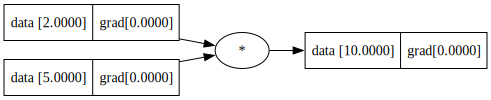

In [8]:
draw_dot(y)

In [9]:
x = Value(2.45)

y = 2*x+6.33
f = y - 2
p = x * f

In [10]:
nodes,edges = trace_fn(p)
print(f'nodes { nodes} ,edges {edges}')

nodes {Value(data=9.23, grad=0), Value(data=4.9, grad=0), Value(data=22.613500000000002, grad=0), Value(data=-2, grad=0), Value(data=2.45, grad=0), Value(data=11.23, grad=0), Value(data=6.33, grad=0), Value(data=2, grad=0)} ,edges {(Value(data=6.33, grad=0), Value(data=11.23, grad=0)), (Value(data=9.23, grad=0), Value(data=22.613500000000002, grad=0)), (Value(data=4.9, grad=0), Value(data=11.23, grad=0)), (Value(data=2.45, grad=0), Value(data=4.9, grad=0)), (Value(data=2.45, grad=0), Value(data=22.613500000000002, grad=0)), (Value(data=-2, grad=0), Value(data=9.23, grad=0)), (Value(data=2, grad=0), Value(data=4.9, grad=0)), (Value(data=11.23, grad=0), Value(data=9.23, grad=0))}


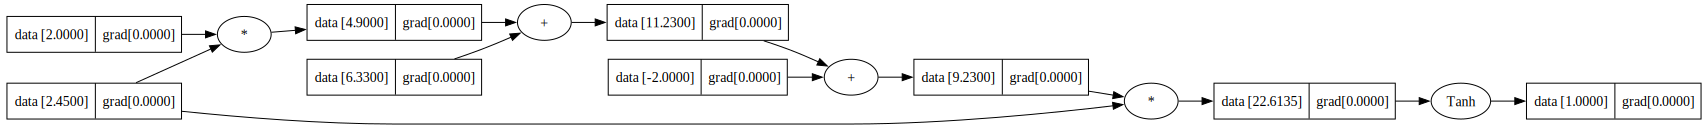

In [11]:
draw_dot(p.tanh())

In [12]:
p.backward()

In [13]:
x = Value(2)
w = 3.4
b = 1
y = w * x + b
y 


Value(data=7.8, grad=0)

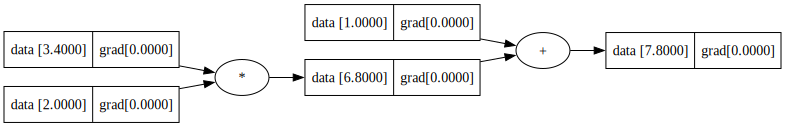

In [14]:
draw_dot(y)

In [15]:
from nn import Neuron,Layer,MLP
model = MLP(2,[16,16,1])

In [16]:
model

MLP of [Layer of [ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2)], Layer of [ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16)], Layer of [LinearNeuron(16)]]

In [17]:
print(len(model.parameters()))

337


In [18]:
model.parameters()

[Value(data=0.26315387165410487, grad=0),
 Value(data=0.8336372612543945, grad=0),
 Value(data=0, grad=0),
 Value(data=0.5416375780394025, grad=0),
 Value(data=0.23801966986696366, grad=0),
 Value(data=0, grad=0),
 Value(data=-0.8640670348990742, grad=0),
 Value(data=-0.34034742360022396, grad=0),
 Value(data=0, grad=0),
 Value(data=-0.08143223543805589, grad=0),
 Value(data=-0.32764656242540213, grad=0),
 Value(data=0, grad=0),
 Value(data=-0.24478724045660027, grad=0),
 Value(data=-0.1517101672518415, grad=0),
 Value(data=0, grad=0),
 Value(data=0.605604839890787, grad=0),
 Value(data=-0.08562636590116068, grad=0),
 Value(data=0, grad=0),
 Value(data=-0.9703793899811657, grad=0),
 Value(data=-0.8817988209813745, grad=0),
 Value(data=0, grad=0),
 Value(data=-0.4769259258848013, grad=0),
 Value(data=-0.8126113933338097, grad=0),
 Value(data=0, grad=0),
 Value(data=0.6953438598190487, grad=0),
 Value(data=0.43698008713824543, grad=0),
 Value(data=0, grad=0),
 Value(data=-0.1431481910774

In [19]:
#training
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=200,noise=0.1)
y = y*2 - 1
X[:5],y

(array([[ 0.03827289,  0.52853165],
        [ 1.74842197,  0.06034892],
        [-0.92955098,  0.2172851 ],
        [ 1.32655265, -0.55326918],
        [-0.0920463 ,  1.08562747]]),
 array([ 1,  1, -1,  1, -1, -1, -1,  1, -1, -1,  1,  1, -1, -1,  1, -1,  1,
        -1, -1, -1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        -1,  1,  1, -1,  1,  1, -1,  1, -1, -1,  1,  1, -1,  1, -1,  1,  1,
        -1,  1, -1,  1,  1, -1,  1, -1, -1, -1,  1,  1,  1, -1,  1, -1, -1,
         1,  1, -1,  1,  1, -1, -1, -1,  1,  1, -1,  1, -1,  1,  1,  1, -1,
        -1,  1,  1,  1, -1, -1, -1, -1, -1,  1,  1,  1, -1,  1, -1, -1,  1,
        -1, -1,  1, -1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1, -1, -1, -1,
         1,  1, -1, -1,  1, -1,  1, -1, -1, -1,  1,  1,  1, -1,  1,  1, -1,
         1,  1,  1, -1,  1, -1,  1,  1,  1,  1, -1, -1, -1, -1,  1,  1,  1,
         1,  1, -1, -1, -1, -1, -1,  1, -1, -1,  1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1,  1,  1, -1, -1, -1,  1,  1, -1, -1

In [20]:
X.shape,y.shape

((200, 2), (200,))

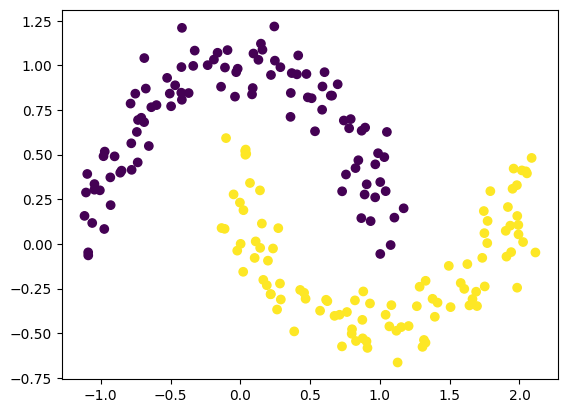

In [21]:
plt.scatter(X[:,0],X[:,1],c=y)

In [22]:
np.random.permutation(100)[:4]

array([89, 40, 97, 83])

In [ ]:
# loss function
def loss_fn(batch_size=None):
    
    if batch_size is None:
        Xb, yb = X, y
    else:
        ri = np.random.permutation(X.shape[0])[:batch_size]
        Xb, yb = X[ri], y[ri]
    inputs = [list(map(Value, xrow)) for xrow in Xb]
    
    # forward the model to get scores
    scores = list(map(model, inputs))
    
    # svm "max-margin" loss
    losses = [(1 + -yi*scorei).relu() for yi, scorei in zip(yb, scores)]
    data_loss = sum(losses) * (1.0 / len(losses))
    # L2 regularization
    alpha = 1e-4
    reg_loss = alpha * sum((p*p for p in model.parameters()))
    total_loss = data_loss + reg_loss
    
    # also get accuracy
    accuracy = [(yi > 0) == (scorei.data > 0) for yi, scorei in zip(yb, scores)]
    return total_loss, sum(accuracy) / len(accuracy)

total_loss, acc = loss_fn()
print(total_loss, acc)

Value(data=0.5614454500949548, grad=0) 0.85


In [ ]:
#training
v = {p : 0 for p in model.parameters()} # param in a dic,velocity
g = 0 #set  gamma how much  of velocity  to  use in next step

first_param = model.parameters()[0]
initial_weight = first_param.data

for k in range(100):
    #forward
    loss, accuracy = loss_fn()

    #reset grads
    model.zero_grad()
    loss.backward() #backprop
    
    #sGD with momentum
    lr = max(0.01, 1.0 - 0.9*k/100)
    for p in model.parameters():
        v_new = (g * v[p]) + p.grad
        p.data -= lr * v_new
        v[p] = v_new

        
    
    if k % 1 == 0:
        movement = first_param.data - initial_weight
        print(f'Step {k} | Loss {loss.data:.4f} | Acc {accuracy} | WeightDelta {movement:.15f}')

Step 0 | Loss 0.5614 | Acc 0.85 | WeightDelta -0.316282334601559
Step 1 | Loss 0.4352 | Acc 0.835 | WeightDelta -0.166208895255422
Step 2 | Loss 0.4278 | Acc 0.825 | WeightDelta -0.483654634755861
Step 3 | Loss 1.1186 | Acc 0.74 | WeightDelta -0.471037875785633
Step 4 | Loss 0.4555 | Acc 0.835 | WeightDelta -0.532515390174442
Step 5 | Loss 0.4369 | Acc 0.86 | WeightDelta -0.435454299509301
Step 6 | Loss 0.2656 | Acc 0.9 | WeightDelta -0.385852379098666
Step 7 | Loss 0.2257 | Acc 0.935 | WeightDelta -0.431079148316989
Step 8 | Loss 0.2051 | Acc 0.93 | WeightDelta -0.394414740102651
Step 9 | Loss 0.1942 | Acc 0.935 | WeightDelta -0.455032821891605
Step 10 | Loss 0.1864 | Acc 0.955 | WeightDelta -0.437996026075735
Step 11 | Loss 0.3353 | Acc 0.87 | WeightDelta -0.540666569921220
Step 12 | Loss 0.2816 | Acc 0.89 | WeightDelta -0.481487989324865
Step 13 | Loss 0.1581 | Acc 0.945 | WeightDelta -0.511303041788414
Step 14 | Loss 0.1454 | Acc 0.955 | WeightDelta -0.495712274359193
Step 15 | Los

(-1.6640332035979366, 2.0859667964020634)

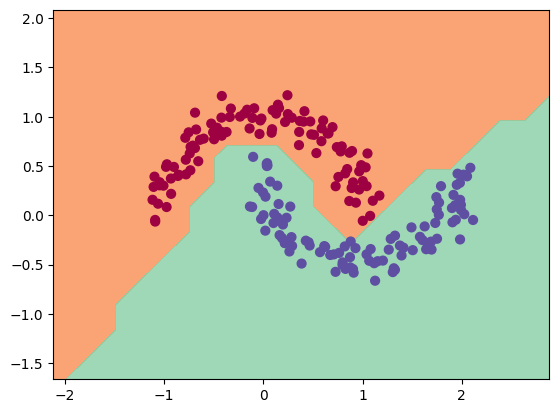

In [25]:
# visualize decision boundary
h = 0.25
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Xmesh = np.c_[xx.ravel(), yy.ravel()]
inputs = [list(map(Value, xrow)) for xrow in Xmesh]
scores = list(map(model, inputs))
Z = np.array([s.data > 0 for s in scores])
Z = Z.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
